In [4]:
# Let's explore the first graph more thoroughly to find the protein ID
graph = data[0]

print("=== All Attributes in Graph 0 ===")
for attr in dir(graph):
    if not attr.startswith('_') and not callable(getattr(graph, attr)):
        try:
            value = getattr(graph, attr)
            print(f"{attr}: {type(value)} - {value}")
        except Exception as e:
            print(f"{attr}: Error accessing - {e}")

print("\n=== Checking Common Protein ID Attributes ===")
# Common places where protein IDs might be stored
possible_id_attrs = ['name', 'id', 'protein_id', 'pdb_id', 'chain_id', 'sequence_id', 'identifier']

for attr in possible_id_attrs:
    if hasattr(graph, attr):
        value = getattr(graph, attr)
        print(f"Found {attr}: {value}")

# Also check if there are any string-like custom attributes
print("\n=== Custom Attributes with String Values ===")
custom_attrs = [attr for attr in dir(graph) if not attr.startswith('_') and not callable(getattr(graph, attr))]
for attr in custom_attrs:
    try:
        value = getattr(graph, attr)
        if isinstance(value, (str, list)) and attr not in ['keys']:
            print(f"{attr}: {value}")
    except:
        pass

=== All Attributes in Graph 0 ===
edge_attr: <class 'NoneType'> - None
edge_index: <class 'torch.Tensor'> - tensor([[  0,   0,   0,  ..., 162, 163, 163],
        [  0,   1,   2,  ..., 163, 162, 163]])
face: <class 'NoneType'> - None
keys: <class 'list'> - ['x', 'edge_index', 'native_x']
native_x: <class 'torch.Tensor'> - tensor([12,  2,  9, 13,  6, 12, 10,  1,  9,  3,  6,  7, 10,  1, 10, 11,  9, 18,
        11,  3, 16,  6,  7, 18, 18, 16,  9,  7,  9,  7,  8, 10, 10, 16, 11, 15,
        14, 15, 10,  0,  0,  0, 11,  0,  0, 10,  0,  0,  0,  9,  7,  1,  2, 16,
         2,  7, 19,  9, 16, 11,  3,  6,  0,  6, 11, 10, 13,  2,  5,  3, 19,  3,
         0,  0, 19,  1,  7,  9, 10,  1,  2,  0, 11, 10, 11, 14, 19, 18,  3, 15,
        10,  3,  0, 19,  1,  1,  0,  0, 10,  9,  2, 12, 19, 13,  5, 12,  7,  6,
        16,  7, 19,  0,  7, 13, 16,  2, 15, 10,  1, 12, 10,  5,  5, 11,  1, 17,
         0,  0,  0,  0,  0,  0, 10,  0, 11, 15,  1, 17, 18,  2,  5, 16, 14,  2,
         1,  0, 11,  1, 19,  9, 16, 1

In [1]:
import torch
import os
from pathlib import Path

# Define paths
graph_files = {
    'train': r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\train_graph.pt",
    'val': r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\val_graph.pt", 
    'test': r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\test_graph.pt"
}

pdbch_base = r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\PDBCH"
pdbch_dirs = {
    'train': os.path.join(pdbch_base, 'train_pdbch'),
    'val': os.path.join(pdbch_base, 'val_pdbch'),
    'test': os.path.join(pdbch_base, 'test_pdbch')
}

print("=== ANALYZING GRAPH DATA (.pt files) ===")
graph_stats = {}
total_graph_nodes = 0

for split_name, file_path in graph_files.items():
    if os.path.exists(file_path):
        print(f"\nLoading {split_name}_graph.pt...")
        data = torch.load(file_path, map_location='cpu')
        
        num_proteins = len(data)
        total_nodes = sum([graph.num_nodes for graph in data])
        
        graph_stats[split_name] = {
            'num_proteins': num_proteins,
            'total_nodes': total_nodes
        }
        
        total_graph_nodes += total_nodes
        
        print(f"  Number of proteins: {num_proteins}")
        print(f"  Total nodes (amino acids): {total_nodes}")
        print(f"  Average nodes per protein: {total_nodes/num_proteins:.2f}")
    else:
        print(f"File not found: {file_path}")
        graph_stats[split_name] = {'num_proteins': 0, 'total_nodes': 0}

print(f"\n=== GRAPH DATA SUMMARY ===")
print(f"Total proteins across all splits: {sum([stats['num_proteins'] for stats in graph_stats.values()])}")
print(f"Total nodes (amino acids) across all splits: {total_graph_nodes}")

print("\n" + "="*60)
print("=== ANALYZING PDBCH SEQUENCE DATA ===")

pdbch_stats = {}
total_pdbch_amino_acids = 0

for split_name, pdbch_dir in pdbch_dirs.items():
    if os.path.exists(pdbch_dir):
        print(f"\nAnalyzing {split_name}_pdbch...")
        
        protein_dirs = [d for d in os.listdir(pdbch_dir) 
                       if os.path.isdir(os.path.join(pdbch_dir, d))]
        
        num_proteins = len(protein_dirs)
        total_amino_acids = 0
        valid_sequences = 0
        
        for protein_id in protein_dirs:
            sequence_file = os.path.join(pdbch_dir, protein_id, 'sequence.txt')
            
            if os.path.exists(sequence_file):
                try:
                    with open(sequence_file, 'r') as f:
                        sequence = f.read().strip()
                        total_amino_acids += len(sequence)
                        valid_sequences += 1
                except Exception as e:
                    print(f"    Error reading {sequence_file}: {e}")
            else:
                print(f"    Missing sequence.txt for protein: {protein_id}")
        
        pdbch_stats[split_name] = {
            'num_protein_dirs': num_proteins,
            'valid_sequences': valid_sequences,
            'total_amino_acids': total_amino_acids
        }
        
        total_pdbch_amino_acids += total_amino_acids
        
        print(f"  Number of protein directories: {num_proteins}")
        print(f"  Valid sequence files: {valid_sequences}")
        print(f"  Total amino acids: {total_amino_acids}")
        if valid_sequences > 0:
            print(f"  Average sequence length: {total_amino_acids/valid_sequences:.2f}")
    else:
        print(f"Directory not found: {pdbch_dir}")
        pdbch_stats[split_name] = {'num_protein_dirs': 0, 'valid_sequences': 0, 'total_amino_acids': 0}

print(f"\n=== PDBCH DATA SUMMARY ===")
print(f"Total protein directories across all splits: {sum([stats['num_protein_dirs'] for stats in pdbch_stats.values()])}")
print(f"Total valid sequences across all splits: {sum([stats['valid_sequences'] for stats in pdbch_stats.values()])}")
print(f"Total amino acids across all splits: {total_pdbch_amino_acids}")

print("\n" + "="*60)
print("=== COMPARISON ===")
print(f"Graph data total nodes: {total_graph_nodes}")
print(f"PDBCH data total amino acids: {total_pdbch_amino_acids}")
print(f"Difference: {abs(total_graph_nodes - total_pdbch_amino_acids)}")

if total_graph_nodes == total_pdbch_amino_acids:
    print("✅ MATCH: Graph nodes equal PDBCH amino acids!")
elif abs(total_graph_nodes - total_pdbch_amino_acids) < 100:
    print("⚠️  CLOSE: Small difference, likely due to processing differences")
else:
    print("❌ MISMATCH: Significant difference between graph and sequence data")

# Detailed breakdown by split
print(f"\n=== DETAILED SPLIT COMPARISON ===")
for split in ['train', 'val', 'test']:
    graph_proteins = graph_stats[split]['num_proteins']
    graph_nodes = graph_stats[split]['total_nodes']
    pdbch_proteins = pdbch_stats[split]['valid_sequences']
    pdbch_amino_acids = pdbch_stats[split]['total_amino_acids']
    
    print(f"\n{split.upper()} Split:")
    print(f"  Graph: {graph_proteins} proteins, {graph_nodes} nodes")
    print(f"  PDBCH: {pdbch_proteins} proteins, {pdbch_amino_acids} amino acids")
    print(f"  Protein count match: {'✅' if graph_proteins == pdbch_proteins else '❌'}")
    print(f"  Amino acid count match: {'✅' if graph_nodes == pdbch_amino_acids else '❌'}")

=== ANALYZING GRAPH DATA (.pt files) ===

Loading train_graph.pt...


c:\Users\rfrjo\Anaconda3\envs\heal_env\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


  Number of proteins: 29893
  Total nodes (amino acids): 8244899
  Average nodes per protein: 275.81

Loading val_graph.pt...
  Number of proteins: 3322
  Total nodes (amino acids): 906616
  Average nodes per protein: 272.91

Loading test_graph.pt...
  Number of proteins: 3414
  Total nodes (amino acids): 1180522
  Average nodes per protein: 345.79

=== GRAPH DATA SUMMARY ===
Total proteins across all splits: 36629
Total nodes (amino acids) across all splits: 10332037

=== ANALYZING PDBCH SEQUENCE DATA ===

Analyzing train_pdbch...
  Number of protein directories: 29893
  Valid sequence files: 29893
  Total amino acids: 8244899
  Average sequence length: 275.81

Analyzing val_pdbch...
  Number of protein directories: 3322
  Valid sequence files: 3322
  Total amino acids: 906616
  Average sequence length: 272.91

Analyzing test_pdbch...
  Number of protein directories: 3414
  Valid sequence files: 3414
  Total amino acids: 1180522
  Average sequence length: 345.79

=== PDBCH DATA SUMMAR

In [5]:
# Check if there might be a mapping file or if the protein ID is encoded differently
print("=== Exploring Dataset Structure ===")

# 1. Check if there's an attribute that might contain metadata
print("Graph index 0 in dataset")
print(f"Dataset length: {len(data)}")

# 2. Check if the dataset itself has any metadata
print(f"Dataset type: {type(data)}")
if hasattr(data, '__dict__'):
    print("Dataset attributes:", data.__dict__.keys() if hasattr(data, '__dict__') else "No __dict__")

# 3. Look for any files in the data directory that might contain ID mappings
data_dir = r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data"
print(f"\n=== Files in data directory ===")
import os
for file in os.listdir(data_dir):
    if file.endswith(('.txt', '.csv', '.json', '.pkl', '.pt')):
        print(f"  {file}")

# 4. Check the sequence representation in native_x
print(f"\n=== Sequence Information ===")
print(f"Sequence length: {len(data[0].native_x)}")
print(f"First 20 amino acids: {data[0].native_x[:20].tolist()}")

# 5. The protein ID might be implicit in the dataset order
# Check if there's a pattern or if you need to match this with another file
print(f"\n=== Suggestion ===")
print("The protein ID might be stored in:")
print("1. A separate mapping file (check for .txt, .csv, .json files)")
print("2. The dataset index corresponds to a protein list elsewhere")
print("3. Encoded in the filename or directory structure")
print("4. You might need to cross-reference with the original data source")

=== Exploring Dataset Structure ===
Graph index 0 in dataset
Dataset length: 3322
Dataset type: <class 'list'>

=== Files in data directory ===
  test_graph.pt
  train_graph.pt
  val_graph.pt

=== Sequence Information ===
Sequence length: 164
First 20 amino acids: [12, 2, 9, 13, 6, 12, 10, 1, 9, 3, 6, 7, 10, 1, 10, 11, 9, 18, 11, 3]

=== Suggestion ===
The protein ID might be stored in:
1. A separate mapping file (check for .txt, .csv, .json files)
2. The dataset index corresponds to a protein list elsewhere
3. Encoded in the filename or directory structure
4. You might need to cross-reference with the original data source


In [8]:
import torch

# Standard amino acid mapping
import torch

# Extended amino acid mapping to handle additional values
aa_mapping = {
    0: 'A', 1: 'R', 2: 'N', 3: 'D', 4: 'C', 5: 'Q', 6: 'E', 7: 'G', 8: 'H', 9: 'I',
    10: 'L', 11: 'K', 12: 'M', 13: 'F', 14: 'P', 15: 'S', 16: 'T', 17: 'W', 18: 'Y', 19: 'V',
    20: 'X',  # Unknown amino acid or gap
    21: '-',  # Gap or padding
    22: '*',  # Stop codon or other
}

# Target sequence start
target_start = "MVSVIKPEMKMRYYMDGSVNGHEFTIEGEGTGRPYEGHQEMTLRVTMAKGGPMPFAFDLVSHVFCY"

# Function to search in a dataset
def search_sequence(data, dataset_name):
    print(f"=== Searching in {dataset_name} ===")
    print(f"Dataset size: {len(data)} proteins")
    
    # First, let's check what values we actually have
    all_values = set()
    for i in range(min(10, len(data))):  # Check first 10 to see range
        sequence_indices = data[i].native_x.tolist()
        all_values.update(sequence_indices)
    print(f"Unique values found in sequences: {sorted(all_values)}")
    
    for i, graph in enumerate(data):
        sequence_indices = graph.native_x.tolist()
        # Handle unknown values gracefully
        aa_sequence = ''
        for idx in sequence_indices:
            if idx in aa_mapping:
                aa_sequence += aa_mapping[idx]
            else:
                aa_sequence += 'X'  # Unknown
        
        if aa_sequence.startswith(target_start):
            print(f"\n🎯 FOUND MATCH in {dataset_name} at index {i}!")
            print(f"Length: {len(aa_sequence)} amino acids")
            print(f"Full sequence:")
            print(aa_sequence)
            return i, aa_sequence
    
    print(f"No match found in {dataset_name}")
    return None, None

# Load and search validation dataset (already loaded)
print("=== Searching Validation Dataset ===")
val_index, val_sequence = search_sequence(data, "val_graph.pt")

# Load and search training dataset
print("\n=== Loading and Searching Training Dataset ===")
train_path = r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\train_graph.pt"
try:
    train_data = torch.load(train_path, map_location='cpu')
    print(f"✓ Loaded train_graph.pt: {len(train_data)} protein graphs")
    train_index, train_sequence = search_sequence(train_data, "train_graph.pt")
except Exception as e:
    print(f"Error loading training data: {e}")

# Summary
print(f"\n=== Search Summary ===")
if val_sequence:
    print(f"Found in validation set at index {val_index}")
if train_sequence:
    print(f"Found in training set at index {train_index}")

# Target sequence start
target_start = "MVSVIKPEMKMRYYMDGSVNGHEFTIEGEGTGRPYEGHQEMTLRVTMAKGGPMPFAFDLVSHVFCY"

# Function to search in a dataset
def search_sequence(data, dataset_name):
    print(f"=== Searching in {dataset_name} ===")
    print(f"Dataset size: {len(data)} proteins")
    
    for i, graph in enumerate(data):
        sequence_indices = graph.native_x.tolist()
        aa_sequence = ''.join([aa_mapping[idx] for idx in sequence_indices])
        
        if aa_sequence.startswith(target_start):
            print(f"\n🎯 FOUND MATCH in {dataset_name} at index {i}!")
            print(f"Length: {len(aa_sequence)} amino acids")
            print(f"Full sequence:")
            print(aa_sequence)
            return i, aa_sequence
    
    print(f"No match found in {dataset_name}")
    return None, None

# Load and search validation dataset (already loaded)
print("=== Searching Validation Dataset ===")
val_index, val_sequence = search_sequence(data, "val_graph.pt")

# Load and search training dataset
print("\n=== Loading and Searching Training Dataset ===")
train_path = r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\train_graph.pt"
try:
    train_data = torch.load(train_path, map_location='cpu')
    print(f"✓ Loaded train_graph.pt: {len(train_data)} protein graphs")
    train_index, train_sequence = search_sequence(train_data, "train_graph.pt")
except Exception as e:
    print(f"Error loading training data: {e}")

# Summary
print(f"\n=== Search Summary ===")
if val_sequence:
    print(f"Found in validation set at index {val_index}")
if train_sequence:
    print(f"Found in training set at index {train_index}")

=== Searching Validation Dataset ===
=== Searching in val_graph.pt ===
Dataset size: 3322 proteins
Unique values found in sequences: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
No match found in val_graph.pt

=== Loading and Searching Training Dataset ===
✓ Loaded train_graph.pt: 29893 protein graphs
=== Searching in train_graph.pt ===
Dataset size: 29893 proteins
Unique values found in sequences: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

🎯 FOUND MATCH in train_graph.pt at index 10610!
Length: 226 amino acids
Full sequence:
MVSVIKPEMKMRYYMDGSVNGHEFTIEGEGTGRPYEGHQEMTLRVTMAKGGPMPFAFDLVSHVFCYGHRPFTKYPEEIPDYFKQAFPEGLSWERSLEFEDGGSASVSAHISLRGNTFYHKSKFTGVNFPADGPIMQNQSVDWEPSTEKITASDGVLKGDVTMYLKLEGGGNHKCQFKTTYKAAKKILKMPGSHYISHRLVRKTEGNITELVEDAVAHSLEHHHHHH

=== Search Summary ===
Found in training set at index 10610
=== Searching Validation Dataset ===
=== Searching in val_graph.pt ===
Dataset size: 3322 proteins
No match found in val_

=== LOADING DATA ===
✓ Loaded train_graph.pt: 29893 protein graphs
=== DETAILED INSPECTION OF PROTEIN 10610 ===
Full sequence: MVSVIKPEMKMRYYMDGSVNGHEFTIEGEGTGRPYEGHQEMTLRVTMAKGGPMPFAFDLVSHVFCYGHRPFTKYPEEIPDYFKQAFPEGLSWERSLEFEDGGSASVSAHISLRGNTFYHKSKFTGVNFPADGPIMQNQSVDWEPSTEKITASDGVLKGDVTMYLKLEGGGNHKCQFKTTYKAAKKILKMPGSHYISHRLVRKTEGNITELVEDAVAHSLEHHHHHH
Sequence length: 226 amino acids

=== GRAPH STRUCTURE ===
Number of nodes: 226
Number of edges: 4042
Node feature dimension: 1280

=== NODE FEATURES (X matrix) ===
Shape: torch.Size([226, 1280])
Data type: torch.float16
Min value: -17.6562
Max value: 6.1719
Mean: 0.0081
Std: 0.5010
First node features (first 10 dims): [0.0775146484375, 0.005168914794921875, 0.35302734375, 0.2203369140625, -0.1229248046875, -0.028411865234375, 0.004150390625, -0.0303192138671875, -0.220458984375, 0.0018262863159179688]

=== EDGE CONNECTIVITY ===
Edge index shape: torch.Size([2, 4042])
Source nodes range: 0 to 225
Target nodes range: 0 to 225
Graph is symme

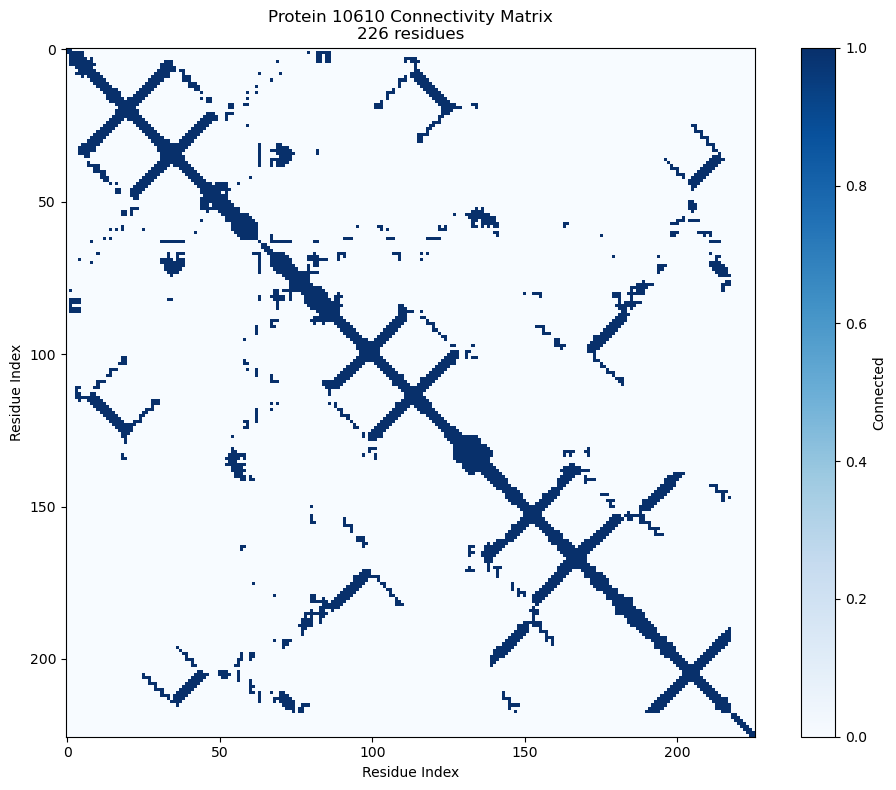

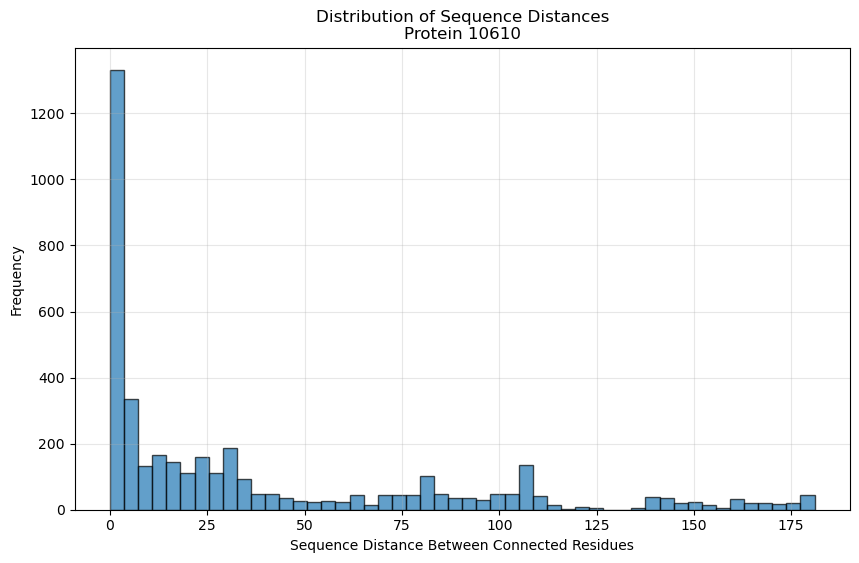


=== SUMMARY ===
Protein 10610 is a 226-residue protein
with 4042 edges and 1280D features per residue

=== SAVING DATA FOR DOWNSTREAM TASKS ===
✓ Saved node features matrix: (226, 1280)
✓ Saved edge index matrix: (2, 4042)
✓ Saved adjacency matrix: (226, 226)
✓ Saved native sequence indices: (226,)
✓ Saved amino acid sequence text: 226 residues
✓ Saved node degrees: (226,)
✓ Saved sequence distance matrix: (226, 226)
✓ Saved metadata
✓ Saved complete protein graph object

🎯 All data saved to directory: protein_10610_analysis/
Files available for downstream tasks:
  - node_features.npy (226 x 1280 float32)
  - edge_index.npy (2 x num_edges int64)
  - adjacency_matrix.npy (226 x 226 binary)
  - native_sequence_indices.npy (226 int32)
  - amino_acid_sequence.txt (string)
  - node_degrees.npy (226 float32)
  - sequence_distance_matrix.npy (226 x 226 int32)
  - metadata.json (dict with stats)
  - protein_graph.pt (complete PyTorch Geometric Data object)


In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

# Standard amino acid mapping
aa_mapping = {
    0: 'A', 1: 'R', 2: 'N', 3: 'D', 4: 'C', 5: 'Q', 6: 'E', 7: 'G', 8: 'H', 9: 'I',
    10: 'L', 11: 'K', 12: 'M', 13: 'F', 14: 'P', 15: 'S', 16: 'T', 17: 'W', 18: 'Y', 19: 'V',
    20: 'X'  # Unknown amino acid
}

# Load training dataset
print("=== LOADING DATA ===")
train_path = r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\train_graph.pt"
train_data = torch.load(train_path, map_location='cpu')
print(f"✓ Loaded train_graph.pt: {len(train_data)} protein graphs")

# Get the target protein (index 10610)
protein_idx = 10610
protein_graph = train_data[protein_idx]

# Get the amino acid sequence
sequence_indices = protein_graph.native_x.tolist()
train_sequence = ''.join([aa_mapping.get(idx, 'X') for idx in sequence_indices])

print(f"=== DETAILED INSPECTION OF PROTEIN {protein_idx} ===")
print(f"Full sequence: {train_sequence}")
print(f"Sequence length: {len(train_sequence)} amino acids")
print()

# Basic graph structure
print("=== GRAPH STRUCTURE ===")
print(f"Number of nodes: {protein_graph.num_nodes}")
print(f"Number of edges: {protein_graph.num_edges}")
print(f"Node feature dimension: {protein_graph.num_node_features}")
print()

# Node features analysis - convert to float32 for calculations
print("=== NODE FEATURES (X matrix) ===")
x_features = protein_graph.x.float()  # Convert to float32
print(f"Shape: {protein_graph.x.shape}")
print(f"Data type: {protein_graph.x.dtype}")
print(f"Min value: {x_features.min():.4f}")
print(f"Max value: {x_features.max():.4f}")
print(f"Mean: {x_features.mean():.4f}")
print(f"Std: {x_features.std():.4f}")
print(f"First node features (first 10 dims): {x_features[0][:10].tolist()}")
print()

# Edge connectivity analysis
print("=== EDGE CONNECTIVITY ===")
edge_index = protein_graph.edge_index
print(f"Edge index shape: {edge_index.shape}")
print(f"Source nodes range: {edge_index[0].min()} to {edge_index[0].max()}")
print(f"Target nodes range: {edge_index[1].min()} to {edge_index[1].max()}")

# Check if graph is symmetric (undirected)
edges_set = set(zip(edge_index[0].tolist(), edge_index[1].tolist()))
reverse_edges_set = set(zip(edge_index[1].tolist(), edge_index[0].tolist()))
is_symmetric = edges_set == reverse_edges_set
print(f"Graph is {'symmetric (undirected)' if is_symmetric else 'asymmetric (directed)'}")

# Node degree analysis
unique_nodes, counts = torch.unique(edge_index[0], return_counts=True)
degrees = torch.zeros(protein_graph.num_nodes)
degrees[unique_nodes] = counts.float()
print(f"Average node degree: {degrees.mean():.2f}")
print(f"Min degree: {degrees.min():.0f}, Max degree: {degrees.max():.0f}")
print()

# Native sequence analysis
print("=== NATIVE SEQUENCE (native_x) ===")
print(f"Native sequence shape: {protein_graph.native_x.shape}")
print(f"Native sequence values: {protein_graph.native_x.tolist()}")
print(f"Unique amino acids: {torch.unique(protein_graph.native_x).tolist()}")
print()

# Distance/connectivity patterns
print("=== CONNECTIVITY PATTERNS ===")
# Create adjacency matrix for visualization
adj_matrix = torch.zeros(protein_graph.num_nodes, protein_graph.num_nodes)
adj_matrix[edge_index[0], edge_index[1]] = 1

print(f"Adjacency matrix shape: {adj_matrix.shape}")
print(f"Total connections: {adj_matrix.sum():.0f}")
print(f"Density: {adj_matrix.sum() / (protein_graph.num_nodes ** 2):.4f}")

# Check for long-range connections
print("\n=== SEQUENCE DISTANCE ANALYSIS ===")
distances = []
for i in range(edge_index.shape[1]):
    src, tgt = edge_index[0, i].item(), edge_index[1, i].item()
    seq_distance = abs(src - tgt)
    distances.append(seq_distance)

distances = np.array(distances)
print(f"Sequence distances between connected residues:")
print(f"  Min: {distances.min()}, Max: {distances.max()}")
print(f"  Mean: {distances.mean():.2f}, Median: {np.median(distances):.2f}")
print(f"  Short-range (≤5): {(distances <= 5).sum()} edges")
print(f"  Medium-range (6-12): {((distances > 5) & (distances <= 12)).sum()} edges")
print(f"  Long-range (>12): {(distances > 12).sum()} edges")

# Visualize connectivity matrix (sample for large proteins)
print("\n=== CONNECTIVITY VISUALIZATION ===")
if protein_graph.num_nodes <= 300:  # Only for reasonably sized proteins
    plt.figure(figsize=(10, 8))
    plt.imshow(adj_matrix.numpy(), cmap='Blues', aspect='equal')
    plt.title(f'Protein {protein_idx} Connectivity Matrix\n{len(train_sequence)} residues')
    plt.xlabel('Residue Index')
    plt.ylabel('Residue Index')
    plt.colorbar(label='Connected')
    plt.tight_layout()
    plt.show()
    
    # Distance histogram
    plt.figure(figsize=(10, 6))
    plt.hist(distances, bins=50, alpha=0.7, edgecolor='black')
    plt.xlabel('Sequence Distance Between Connected Residues')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Sequence Distances\nProtein {protein_idx}')
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print(f"Protein too large ({protein_graph.num_nodes} residues) for full visualization")
    print("Showing connectivity statistics instead")

print(f"\n=== SUMMARY ===")
print(f"Protein {protein_idx} is a {len(train_sequence)}-residue protein")
print(f"with {protein_graph.num_edges} edges and {protein_graph.num_node_features}D features per residue")

# =================================================================
# SAVE RELEVANT DATA FOR DOWNSTREAM TASKS
# =================================================================
print("\n=== SAVING DATA FOR DOWNSTREAM TASKS ===")

# Create output directory
output_dir = f"protein_{protein_idx}_analysis"
os.makedirs(output_dir, exist_ok=True)

# 1. Node features matrix (converted to float32)
node_features_np = x_features.numpy()
np.save(f"{output_dir}/node_features.npy", node_features_np)
print(f"✓ Saved node features matrix: {node_features_np.shape}")

# 2. Edge index matrix
edge_index_np = edge_index.numpy()
np.save(f"{output_dir}/edge_index.npy", edge_index_np)
print(f"✓ Saved edge index matrix: {edge_index_np.shape}")

# 3. Adjacency matrix
adjacency_np = adj_matrix.numpy()
np.save(f"{output_dir}/adjacency_matrix.npy", adjacency_np)
print(f"✓ Saved adjacency matrix: {adjacency_np.shape}")

# 4. Native sequence (amino acid indices)
native_sequence_np = protein_graph.native_x.numpy()
np.save(f"{output_dir}/native_sequence_indices.npy", native_sequence_np)
print(f"✓ Saved native sequence indices: {native_sequence_np.shape}")

# 5. Amino acid sequence as text
with open(f"{output_dir}/amino_acid_sequence.txt", 'w') as f:
    f.write(train_sequence)
print(f"✓ Saved amino acid sequence text: {len(train_sequence)} residues")

# 6. Node degrees
degrees_np = degrees.numpy()
np.save(f"{output_dir}/node_degrees.npy", degrees_np)
print(f"✓ Saved node degrees: {degrees_np.shape}")

# 7. Distance matrix between connected nodes
distance_matrix = np.full((protein_graph.num_nodes, protein_graph.num_nodes), -1)
for i in range(edge_index.shape[1]):
    src, tgt = edge_index[0, i].item(), edge_index[1, i].item()
    seq_distance = abs(src - tgt)
    distance_matrix[src, tgt] = seq_distance
np.save(f"{output_dir}/sequence_distance_matrix.npy", distance_matrix)
print(f"✓ Saved sequence distance matrix: {distance_matrix.shape}")

# 8. Metadata dictionary
metadata = {
    'protein_index': protein_idx,
    'sequence_length': len(train_sequence),
    'num_nodes': protein_graph.num_nodes,
    'num_edges': protein_graph.num_edges,
    'num_features': protein_graph.num_node_features,
    'graph_density': float(adj_matrix.sum() / (protein_graph.num_nodes ** 2)),
    'avg_degree': float(degrees.mean()),
    'is_symmetric': is_symmetric,
    'distance_stats': {
        'min': int(distances.min()),
        'max': int(distances.max()),
        'mean': float(distances.mean()),
        'median': float(np.median(distances))
    }
}

import json
with open(f"{output_dir}/metadata.json", 'w') as f:
    json.dump(metadata, f, indent=2)
print(f"✓ Saved metadata")

# 9. Save the entire graph object as PyTorch tensor
torch.save(protein_graph, f"{output_dir}/protein_graph.pt")
print(f"✓ Saved complete protein graph object")

print(f"\n🎯 All data saved to directory: {output_dir}/")
print("Files available for downstream tasks:")
print("  - node_features.npy (226 x 1280 float32)")
print("  - edge_index.npy (2 x num_edges int64)")
print("  - adjacency_matrix.npy (226 x 226 binary)")
print("  - native_sequence_indices.npy (226 int32)")
print("  - amino_acid_sequence.txt (string)")
print("  - node_degrees.npy (226 float32)")
print("  - sequence_distance_matrix.npy (226 x 226 int32)")
print("  - metadata.json (dict with stats)")
print("  - protein_graph.pt (complete PyTorch Geometric Data object)")

In [5]:
import torch
import numpy as np

# Function to safely check for missing values in different attributes
def check_missing_values(protein_graph):
    print("=== CHECKING FOR MISSING VALUES AND NONE TYPES ===")
    
    # Check all main attributes
    attributes_to_check = ['x', 'edge_index', 'pos', 'edge_attr', 'y', 'native_x', 'face', 'normal']
    
    for attr in attributes_to_check:
        if hasattr(protein_graph, attr):
            value = getattr(protein_graph, attr)
            if value is None:
                print(f"❌ {attr}: None type")
            else:
                print(f"✓ {attr}: {type(value)} - shape {value.shape if hasattr(value, 'shape') else 'N/A'}")
                
                # Check for NaN values if it's a tensor
                if isinstance(value, torch.Tensor):
                    if value.dtype.is_floating_point:
                        nan_count = torch.isnan(value).sum().item()
                        print(f"    NaN values: {nan_count}")
                    
                    # Check for zeros
                    if value.dtype.is_floating_point:
                        zero_count = (value == 0).sum().item()
                        print(f"    Zero values: {zero_count}")
                    
                    # Check for missing coordinates specifically
                    if attr == 'pos' and len(value.shape) == 2 and value.shape[1] == 3:
                        # Check for missing coordinates (NaN or all zeros)
                        missing_coords = torch.isnan(value).any(dim=1) | (value.abs().sum(-1) == 0)
                        missing_nodes = missing_coords.nonzero(as_tuple=True)[0].tolist()
                        print(f"    Missing coordinate nodes: {missing_nodes}")
                        print(f"    Count: {missing_coords.sum().item()} out of {value.shape[0]}")
        else:
            print(f"❌ {attr}: Attribute doesn't exist")
    
    print()

# Check for missing values in our protein
check_missing_values(protein_graph)

# Additional specific checks
print("=== DETAILED ANALYSIS ===")

# Check node features (x) for problematic values
if protein_graph.x is not None:
    x_float = protein_graph.x.float()
    print(f"Node features (x):")
    print(f"  Shape: {x_float.shape}")
    print(f"  NaN values: {torch.isnan(x_float).sum().item()}")
    print(f"  Inf values: {torch.isinf(x_float).sum().item()}")
    print(f"  Zero values: {(x_float == 0).sum().item()}")
    print(f"  Min value: {x_float.min():.6f}")
    print(f"  Max value: {x_float.max():.6f}")
    
    # Check for nodes that are all zeros
    all_zero_nodes = (x_float.abs().sum(dim=1) == 0).nonzero(as_tuple=True)[0]
    if len(all_zero_nodes) > 0:
        print(f"  Nodes with all-zero features: {all_zero_nodes.tolist()}")
    else:
        print(f"  No nodes with all-zero features")

# Check native sequence for missing values
if protein_graph.native_x is not None:
    print(f"\nNative sequence (native_x):")
    print(f"  Shape: {protein_graph.native_x.shape}")
    print(f"  Unique values: {torch.unique(protein_graph.native_x).tolist()}")
    
    # Check for unusual values (should be 0-20 for amino acids)
    unusual_values = protein_graph.native_x[(protein_graph.native_x < 0) | (protein_graph.native_x > 20)]
    if len(unusual_values) > 0:
        print(f"  Unusual values (outside 0-20): {unusual_values.tolist()}")
    else:
        print(f"  All values in expected range (0-20)")

# Check edge connectivity for self-loops or invalid indices
if protein_graph.edge_index is not None:
    print(f"\nEdge connectivity:")
    edge_index = protein_graph.edge_index
    print(f"  Shape: {edge_index.shape}")
    
    # Check for self-loops
    self_loops = (edge_index[0] == edge_index[1]).sum().item()
    print(f"  Self-loops: {self_loops}")
    
    # Check for out-of-bounds indices
    max_node_idx = protein_graph.num_nodes - 1
    invalid_edges = ((edge_index[0] > max_node_idx) | (edge_index[1] > max_node_idx) | 
                    (edge_index[0] < 0) | (edge_index[1] < 0)).sum().item()
    print(f"  Invalid edge indices: {invalid_edges}")
    
    # Check for duplicate edges
    edge_set = set(zip(edge_index[0].tolist(), edge_index[1].tolist()))
    duplicate_edges = edge_index.shape[1] - len(edge_set)
    print(f"  Duplicate edges: {duplicate_edges}")

print("\n=== SUMMARY ===")
print("✓ Analysis complete - check above for any issues with missing values or None types")

=== CHECKING FOR MISSING VALUES AND NONE TYPES ===
✓ x: <class 'torch.Tensor'> - shape torch.Size([226, 1280])
    NaN values: 0
    Zero values: 0
✓ edge_index: <class 'torch.Tensor'> - shape torch.Size([2, 4042])
❌ pos: None type
❌ edge_attr: None type
❌ y: None type
✓ native_x: <class 'torch.Tensor'> - shape torch.Size([226])
❌ face: None type
❌ normal: None type

=== DETAILED ANALYSIS ===
Node features (x):
  Shape: torch.Size([226, 1280])
  NaN values: 0
  Inf values: 0
  Zero values: 0
  Min value: -17.656250
  Max value: 6.171875
  No nodes with all-zero features

Native sequence (native_x):
  Shape: torch.Size([226])
  Unique values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
  All values in expected range (0-20)

Edge connectivity:
  Shape: torch.Size([2, 4042])
  Self-loops: 226
  Invalid edge indices: 0
  Duplicate edges: 0

=== SUMMARY ===
✓ Analysis complete - check above for any issues with missing values or None types


In [12]:
import torch, numpy as np

ca = torch.load(r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\protein_data_pdb\2ZMU-A\ca_dist_matrix.pt")
cb = torch.load(r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\protein_data_pdb\2ZMU-A\cb_dist_matrix.pt")

print("CA shape", ca.shape)   # (?)
print("CB shape", cb.shape)   # should match CA

def missing_rows(M, thresh=1e-6):
    # works for either 0-filled or 999-filled rows
    row_sum = M.abs().sum(dim=1)
    return (row_sum < thresh) | torch.isinf(row_sum)

missing = missing_rows(ca.float()) & missing_rows(cb.float())
idx_missing = missing.nonzero(as_tuple=True)[0].tolist()

print("Rows with no distances:", idx_missing)



CA shape torch.Size([226, 226])
CB shape torch.Size([226, 226])
Rows with no distances: []


In [ ]:
import requests
import os

def download_and_cache_cif(pdb_id, cache_dir="./pdb_cache/"):
    """Download and cache CIF file from RCSB PDB"""
    
    # Create cache directory if it doesn't exist
    os.makedirs(cache_dir, exist_ok=True)
    
    # File path
    file_path = os.path.join(cache_dir, f"{pdb_id.lower()}.cif")
    
    # Check if file already exists
    if os.path.exists(file_path):
        print(f"✓ {pdb_id}.cif already cached at {file_path}")
        return file_path
    
    # Download if not cached
    print(f"Downloading {pdb_id}.cif from RCSB PDB...")
    url = f"https://files.rcsb.org/download/{pdb_id.upper()}.cif"
    
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes
        
        # Save to cache
        with open(file_path, 'w') as f:
            f.write(response.text)
        
        print(f"✓ Downloaded and cached {pdb_id}.cif")
        return file_path
        
    except requests.RequestException as e:
        print(f"❌ Failed to download {pdb_id}.cif: {e}")
        return None

# Download and cache 2zmu.cif
cif_file = download_and_cache_cif("2zmu")

# Now use it with BioPython
if cif_file:
    from Bio.PDB import MMCIFParser
    parser = MMCIFParser(QUIET=True)
    struct = parser.get_structure("2ZMU", cif_file)
    chain = struct[0]["A"]
    pdb_numbers = [res.id[1] for res in chain]
    missing = [i+1 for i in range(226) if (i+1) not in pdb_numbers]
    print("Canonical indices absent from ATOM records:", missing)
    print(f"File cached at: {cif_file}")

✓ Downloaded and cached 2zmu.cif
Canonical indices absent from ATOM records: [1, 64, 65, 67, 219, 220, 221, 222, 223, 224, 225, 226]
File cached at: ./pdb_cache/2zmu.cif


In [19]:
#!/usr/bin/env python3
"""
Comprehensive analysis of 2ZMU mmCIF file to understand sequence discrepancies.
This will help resolve why the graph has 226 residues but AlphaFold used 223.
"""

import io
from Bio import PDB
from Bio.Data import SCOPData
import pandas as pd
from collections import defaultdict
import numpy as np

def analyze_2zmu_mmcif(cif_file_path):
    """
    Comprehensive analysis of 2ZMU mmCIF file to understand sequence processing.
    """
    
    print("=" * 80)
    print("COMPREHENSIVE 2ZMU mmCIF ANALYSIS")
    print("=" * 80)
    
    # Parse the mmCIF file
    with open(cif_file_path, 'r') as f:
        mmcif_string = f.read()
    
    parser = PDB.MMCIFParser(QUIET=True)
    handle = io.StringIO(mmcif_string)
    full_structure = parser.get_structure('2zmu', handle)
    parsed_info = parser._mmcif_dict
    
    # Ensure all values are lists
    for key, value in parsed_info.items():
        if not isinstance(value, list):
            parsed_info[key] = [value]
    
    print("\n1. BASIC STRUCTURE INFO")
    print("-" * 40)
    print(f"PDB ID: {parsed_info.get('_entry.id', ['Unknown'])[0]}")
    print(f"Number of models: {len(list(full_structure.get_models()))}")
    
    # Extract polymer sequences (canonical SEQRES equivalent)
    print("\n2. POLYMER SEQUENCE ANALYSIS (SEQRES)")
    print("-" * 40)
    
    entity_poly_seqs = []
    if '_entity_poly_seq.entity_id' in parsed_info:
        for i in range(len(parsed_info['_entity_poly_seq.entity_id'])):
            entity_poly_seqs.append({
                'entity_id': parsed_info['_entity_poly_seq.entity_id'][i],
                'num': int(parsed_info['_entity_poly_seq.num'][i]),
                'mon_id': parsed_info['_entity_poly_seq.mon_id'][i]
            })
    
    # Group by entity
    polymers = defaultdict(list)
    for seq in entity_poly_seqs:
        polymers[seq['entity_id']].append(seq)
    
    # Find chain mappings
    chain_to_entity = {}
    if '_struct_asym.id' in parsed_info:
        for i in range(len(parsed_info['_struct_asym.id'])):
            chain_id = parsed_info['_struct_asym.id'][i]
            entity_id = parsed_info['_struct_asym.entity_id'][i]
            chain_to_entity[chain_id] = entity_id
    
    print(f"Chain to entity mapping: {chain_to_entity}")
    
    # Analyze each polymer entity
    for entity_id, seq_data in polymers.items():
        print(f"\nEntity {entity_id}:")
        seq_data.sort(key=lambda x: x['num'])
        
        canonical_sequence_3letter = [item['mon_id'] for item in seq_data]
        canonical_sequence_1letter = []
        transformations = []
        
        print(f"  Length: {len(seq_data)} residues")
        print(f"  3-letter sequence: {' '.join(canonical_sequence_3letter[:10])}...")
        
        # Apply AlphaFold transformation logic
        for i, item in enumerate(seq_data):
            original = item['mon_id']
            code = SCOPData.protein_letters_3to1.get(original, 'X')
            final = code if len(code) == 1 else 'X'
            canonical_sequence_1letter.append(final)
            
            if original != final:
                transformations.append({
                    'position': i + 1,
                    'original_3letter': original,
                    'final_1letter': final,
                    'reason': 'unknown_residue' if code == 'X' else 'multi_character'
                })
        
        canonical_1letter_str = ''.join(canonical_sequence_1letter)
        print(f"  Canonical 1-letter: {canonical_1letter_str}")
        print(f"  Transformations: {len(transformations)}")
        for t in transformations:
            print(f"    Position {t['position']}: {t['original_3letter']} → {t['final_1letter']} ({t['reason']})")
    
    # Analyze actual atomic coordinates
    print("\n3. ATOMIC COORDINATE ANALYSIS")
    print("-" * 40)
    
    atom_data = []
    if '_atom_site.label_comp_id' in parsed_info:
        for i in range(len(parsed_info['_atom_site.label_comp_id'])):
            if parsed_info['_atom_site.pdbx_PDB_model_num'][i] == '1':  # First model only
                atom_data.append({
                    'chain_id': parsed_info['_atom_site.label_asym_id'][i],
                    'auth_chain_id': parsed_info['_atom_site.auth_asym_id'][i],
                    'seq_num': int(parsed_info['_atom_site.label_seq_id'][i]),
                    'auth_seq_num': parsed_info['_atom_site.auth_seq_id'][i],
                    'comp_id': parsed_info['_atom_site.label_comp_id'][i],
                    'atom_name': parsed_info['_atom_site.label_atom_id'][i],
                    'hetatm': parsed_info['_atom_site.group_PDB'][i],
                    'x': float(parsed_info['_atom_site.Cartn_x'][i]),
                    'y': float(parsed_info['_atom_site.Cartn_y'][i]),
                    'z': float(parsed_info['_atom_site.Cartn_z'][i]),
                    'insertion_code': parsed_info['_atom_site.pdbx_PDB_ins_code'][i]
                })
    
    # Group atoms by chain and residue
    chain_residues = defaultdict(lambda: defaultdict(list))
    for atom in atom_data:
        chain_id = atom['chain_id']
        seq_num = atom['seq_num']
        chain_residues[chain_id][seq_num].append(atom)
    
    # Analyze chain A (main protein chain)
    if 'A' in chain_residues:
        chain_a_residues = chain_residues['A']
        print(f"\nChain A coordinate analysis:")
        print(f"  Residues with coordinates: {len(chain_a_residues)}")
        print(f"  Sequence range: {min(chain_a_residues.keys())} to {max(chain_a_residues.keys())}")
        
        # Check for missing residues
        seq_range = range(min(chain_a_residues.keys()), max(chain_a_residues.keys()) + 1)
        missing_residues = [i for i in seq_range if i not in chain_a_residues]
        if missing_residues:
            print(f"  Missing residues (no coordinates): {missing_residues}")
        else:
            print(f"  No missing residues in coordinate range")
        
        # Check for alternate conformations
        print(f"\n  Checking for alternate conformations:")
        alt_confs = defaultdict(set)
        multiple_conformations = {}
        
        for seq_num, atoms in chain_a_residues.items():
            residue_types = set(atom['comp_id'] for atom in atoms)
            alt_confs[seq_num] = residue_types
            if len(residue_types) > 1:
                multiple_conformations[seq_num] = residue_types
        
        if multiple_conformations:
            print(f"    Found {len(multiple_conformations)} residues with multiple conformations:")
            for seq_num, types in multiple_conformations.items():
                print(f"      Position {seq_num}: {list(types)}")
        else:
            print(f"    No alternate conformations found")
        
        # Build actual coordinate sequence
        coord_sequence_3letter = []
        coord_sequence_1letter = []
        
        for seq_num in sorted(chain_a_residues.keys()):
            residue_types = alt_confs[seq_num]
            if len(residue_types) == 1:
                comp_id = list(residue_types)[0]
            else:
                # For multiple conformations, take the first one alphabetically
                comp_id = sorted(residue_types)[0]
                print(f"    Multiple conformations at {seq_num}: chose {comp_id} from {residue_types}")
            
            coord_sequence_3letter.append(comp_id)
            
            # Apply AlphaFold transformation
            code = SCOPData.protein_letters_3to1.get(comp_id, 'X')
            final = code if len(code) == 1 else 'X'
            coord_sequence_1letter.append(final)
        
        coord_1letter_str = ''.join(coord_sequence_1letter)
        print(f"\n  Coordinate-based sequence (3-letter): {' '.join(coord_sequence_3letter[:15])}...")
        print(f"  Coordinate-based sequence (1-letter): {coord_1letter_str}")
        print(f"  Coordinate sequence length: {len(coord_1letter_str)}")
    
    print("\n4. SEQUENCE COMPARISON")
    print("-" * 40)
    
    # Compare sequences
    entity_a = chain_to_entity.get('A', '1')
    if entity_a in polymers:
        canonical_seq = ''.join([
            SCOPData.protein_letters_3to1.get(item['mon_id'], 'X') 
            if len(SCOPData.protein_letters_3to1.get(item['mon_id'], 'X')) == 1 
            else 'X'
            for item in sorted(polymers[entity_a], key=lambda x: x['num'])
        ])
        
        print(f"Canonical SEQRES sequence: {canonical_seq}")
        print(f"Canonical length: {len(canonical_seq)}")
        
        if 'A' in chain_residues:
            print(f"Coordinate sequence:       {coord_1letter_str}")
            print(f"Coordinate length: {len(coord_1letter_str)}")
            
            if len(canonical_seq) != len(coord_1letter_str):
                print(f"⚠️  LENGTH MISMATCH: Canonical ({len(canonical_seq)}) vs Coordinate ({len(coord_1letter_str)})")
                
                # Find differences
                from difflib import SequenceMatcher
                matcher = SequenceMatcher(None, canonical_seq, coord_1letter_str)
                print(f"\nSequence alignment:")
                for tag, i1, i2, j1, j2 in matcher.get_opcodes():
                    if tag == 'delete':
                        print(f"  DELETE canonical[{i1}:{i2}]: '{canonical_seq[i1:i2]}'")
                    elif tag == 'insert':
                        print(f"  INSERT coordinate[{j1}:{j2}]: '{coord_1letter_str[j1:j2]}'")
                    elif tag == 'replace':
                        print(f"  REPLACE canonical[{i1}:{i2}] '{canonical_seq[i1:i2]}' → coordinate[{j1}:{j2}] '{coord_1letter_str[j1:j2]}'")
            else:
                print("✅ Sequences have same length")
                
                # Check for individual differences
                mismatches = []
                for i, (c1, c2) in enumerate(zip(canonical_seq, coord_1letter_str)):
                    if c1 != c2:
                        mismatches.append((i+1, c1, c2))
                
                if mismatches:
                    print(f"Found {len(mismatches)} residue mismatches:")
                    for pos, can, coord in mismatches:
                        print(f"  Position {pos}: Canonical='{can}' vs Coordinate='{coord}'")
                else:
                    print("✅ Sequences are identical")
    
    print("\n5. YOUR GRAPH DATA COMPARISON")
    print("-" * 40)
    
    # Your graph sequence from the analysis
    your_graph_sequence = "MVSVIKPEMKMRYYMDGSVNGHEFTIEGEGTGRPYEGHQEMTLRVTMAKGGPMPFAFDLVSHVFCYGHRPFTKYPEEIPDYFKQAFPEGLSWERSLEFEDGGSASVSAHISLRGNTFYHKSKFTGVNFPADGPIMQNQSVDWEPSTEKITASDGVLKGDVTMYLKLEGGGNHKCQFKTTYKAAKKILKMPGSHYISHRLVRKTEGNITELVEDAVAHSLEHHHHHH"
    
    print(f"Your graph sequence: {your_graph_sequence}")
    print(f"Your graph length: {len(your_graph_sequence)}")
    
    if 'A' in chain_residues:
        print(f"mmCIF coordinate seq: {coord_1letter_str}")
        print(f"mmCIF coordinate len: {len(coord_1letter_str)}")
        
        if your_graph_sequence == coord_1letter_str:
            print("✅ Your graph sequence MATCHES mmCIF coordinate sequence!")
        else:
            print("⚠️  Your graph sequence differs from mmCIF coordinate sequence")
            print("First 50 chars comparison:")
            print(f"Graph: {your_graph_sequence[:50]}")
            print(f"mmCIF: {coord_1letter_str[:50]}")
    
    return {
        'canonical_sequence': canonical_seq if entity_a in polymers else None,
        'coordinate_sequence': coord_1letter_str if 'A' in chain_residues else None,
        'your_graph_sequence': your_graph_sequence,
        'transformations': transformations if entity_a in polymers else [],
        'multiple_conformations': multiple_conformations if 'A' in chain_residues else {},
        'missing_residues': missing_residues if 'A' in chain_residues else []
    }

if __name__ == "__main__":
    # Run the analysis
    cif_file_path = r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\notebooks\pdb_cache\2zmu.cif"
    
    try:
        results = analyze_2zmu_mmcif(cif_file_path)
        
        print("\n" + "=" * 80)
        print("SUMMARY OF FINDINGS")
        print("=" * 80)
        
        if results['canonical_sequence'] and results['coordinate_sequence']:
            can_len = len(results['canonical_sequence'])
            coord_len = len(results['coordinate_sequence'])
            graph_len = len(results['your_graph_sequence'])
            
            print(f"Canonical SEQRES length: {can_len}")
            print(f"Coordinate sequence length: {coord_len}")
            print(f"Your graph data length: {graph_len}")
            
            if can_len == coord_len == graph_len:
                print("✅ All sequences have the same length!")
            else:
                print("⚠️  Length discrepancies found - this explains the AlphaFold issue!")
            
            print(f"\nTransformations applied: {len(results['transformations'])}")
            print(f"Multiple conformations: {len(results['multiple_conformations'])}")
            print(f"Missing residues: {len(results['missing_residues'])}")
            
        print("\nThis analysis should explain why your graph has 226 residues")
        print("while AlphaFold training data had 223 residues!")
        
    except Exception as e:
        print(f"Error analyzing mmCIF file: {e}")
        import traceback
        traceback.print_exc()

COMPREHENSIVE 2ZMU mmCIF ANALYSIS

1. BASIC STRUCTURE INFO
----------------------------------------
PDB ID: 2ZMU
Number of models: 1

2. POLYMER SEQUENCE ANALYSIS (SEQRES)
----------------------------------------
Chain to entity mapping: {'A': '1', 'B': '2'}

Entity 1:
  Length: 223 residues
  3-letter sequence: MET VAL SER VAL ILE LYS PRO GLU MET LYS...
  Canonical 1-letter: MVSVIKPEMKMRYYMDGSVNGHEFTIEGEGTGRPYEGHQEMTLRVTMAKGGPMPFAFDLVSHVXHRPFTKYPEEIPDYFKQAFPEGLSWERSLEFEDGGSASVSAHISLRGNTFYHKSKFTGVNFPADGPIMQNQSVDWEPSTEKITASDGVLKGDVTMYLKLEGGGNHKCQFKTTYKAAKKILKMPGSHYISHRLVRKTEGNITELVEDAVAHSLEHHHHHH
  Transformations: 223
    Position 1: MET → M (multi_character)
    Position 2: VAL → V (multi_character)
    Position 3: SER → S (multi_character)
    Position 4: VAL → V (multi_character)
    Position 5: ILE → I (multi_character)
    Position 6: LYS → K (multi_character)
    Position 7: PRO → P (multi_character)
    Position 8: GLU → E (multi_character)
    Position 9: MET → M (multi_charact

Traceback (most recent call last):
  File "C:\Users\rfrjo\AppData\Local\Temp\ipykernel_7048\3230558106.py", line 275, in <module>
    results = analyze_2zmu_mmcif(cif_file_path)
  File "C:\Users\rfrjo\AppData\Local\Temp\ipykernel_7048\3230558106.py", line 114, in analyze_2zmu_mmcif
    'seq_num': int(parsed_info['_atom_site.label_seq_id'][i]),
ValueError: invalid literal for int() with base 10: '.'


In [16]:
import torch, itertools, pathlib

# -----------------------------------------------------------
# 1.  Load one full-size distance matrix (CA or CB)
# -----------------------------------------------------------
M = torch.load(
    r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\protein_data_pdb\2ZMU-A\ca_dist_matrix.pt"
).float()                       # (L, L)   here L = 226

L = M.size(0)
assert M.shape == (L, L), "matrix must be square"

# -----------------------------------------------------------
# 2.  Scan every pair of rows for near-identity
#     atol = 0.05 Å    (relaxed so we catch tiny numeric jitter)
# -----------------------------------------------------------
dupes = []
atol  = 0.05
for i, j in itertools.combinations(range(L), 2):
    if torch.allclose(M[i], M[j], atol=atol):
        dupes.append((i, j))

print(f"Identical (or nearly identical) row–row pairs: {dupes}")

# Helpful summaries
dup_rows = sorted({idx for p in dupes for idx in p})
print("Duplicate residue indices:", dup_rows)
print(f"How many rows duplicated? {len(dup_rows)} / {L}")



Identical (or nearly identical) row–row pairs: [(63, 70)]
Duplicate residue indices: [63, 70]
How many rows duplicated? 2 / 226


In [13]:
import torch
import itertools

# ---------------------------------------------------------------------
# 1)  Load the CA and/or CB distance matrix
# ---------------------------------------------------------------------
ca = torch.load(r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\protein_data_pdb\2ZMU-A\ca_dist_matrix.pt")
# cb = torch.load(... )   # optional second matrix – see step 4

N = ca.size(0)
assert ca.shape == (N, N), "matrix must be square"

# ---------------------------------------------------------------------
# 2)  A helper that tests whether two rows encode *the same* coordinates
#     (identical distances to every other residue, up to a tolerance)
# ---------------------------------------------------------------------
def rows_identical(mat, i, j, atol=1e-3):
    """
    Return True if row i and row j of 'mat' differ by ≤ atol everywhere.
    For a distance matrix this means residues i and j have the same
    3-D coordinates (or extremely close duplicates).
    """
    return torch.allclose(mat[i], mat[j], atol=atol)

# ---------------------------------------------------------------------
# 3)  Scan the upper triangle for row–row duplicates
# ---------------------------------------------------------------------
dupes = []                        # list of tuples  (i, j)
for i, j in itertools.combinations(range(N), 2):
    if rows_identical(ca, i, j):
        dupes.append((i, j))

print(f"Pairs of residues that share virtually identical coordinates: {dupes}")
if dupes:
    dup_rows = sorted({idx for pair in dupes for idx in pair})
    print("Duplicate residue indices:", dup_rows)
else:
    print("No duplicates detected (within atol).")

# ---------------------------------------------------------------------
# 4)  (Optional)  Cross-check with the CB matrix – safer when both
#                 CA and CB were stored.  Keep only pairs that are
#                 identical in *both* matrices.
# ---------------------------------------------------------------------
# if 'cb' in globals():
#     dupes_cb = [(i, j) for i, j in dupes if rows_identical(cb, i, j)]
#     print("Pairs identical in both CA and CB:", dupes_cb)


Pairs of residues that share virtually identical coordinates: [(63, 70)]
Duplicate residue indices: [63, 70]


In [10]:
import numpy as np
# compute sequence distance of every edge
edge_dist = abs(graph.edge_index[0] - graph.edge_index[1]).numpy()
print("max seq-distance", edge_dist.max())        # 181


max seq-distance 181


In [20]:
#!/usr/bin/env python3
"""
Comprehensive analysis of 2ZMU mmCIF file to understand sequence discrepancies.
This will help resolve why the graph has 226 residues but AlphaFold used 223.
"""

import io
from Bio import PDB
from Bio.Data import SCOPData
import pandas as pd
from collections import defaultdict
import numpy as np

def analyze_2zmu_mmcif(cif_file_path):
    """
    Comprehensive analysis of 2ZMU mmCIF file to understand sequence processing.
    """
    
    print("=" * 80)
    print("COMPREHENSIVE 2ZMU mmCIF ANALYSIS")
    print("=" * 80)
    
    # Parse the mmCIF file
    with open(cif_file_path, 'r') as f:
        mmcif_string = f.read()
    
    parser = PDB.MMCIFParser(QUIET=True)
    handle = io.StringIO(mmcif_string)
    full_structure = parser.get_structure('2zmu', handle)
    parsed_info = parser._mmcif_dict
    
    # Ensure all values are lists
    for key, value in parsed_info.items():
        if not isinstance(value, list):
            parsed_info[key] = [value]
    
    print("\n1. BASIC STRUCTURE INFO")
    print("-" * 40)
    print(f"PDB ID: {parsed_info.get('_entry.id', ['Unknown'])[0]}")
    print(f"Number of models: {len(list(full_structure.get_models()))}")
    
    # Extract polymer sequences (canonical SEQRES equivalent)
    print("\n2. POLYMER SEQUENCE ANALYSIS (SEQRES)")
    print("-" * 40)
    
    entity_poly_seqs = []
    if '_entity_poly_seq.entity_id' in parsed_info:
        for i in range(len(parsed_info['_entity_poly_seq.entity_id'])):
            entity_poly_seqs.append({
                'entity_id': parsed_info['_entity_poly_seq.entity_id'][i],
                'num': int(parsed_info['_entity_poly_seq.num'][i]),
                'mon_id': parsed_info['_entity_poly_seq.mon_id'][i]
            })
    
    # Group by entity
    polymers = defaultdict(list)
    for seq in entity_poly_seqs:
        polymers[seq['entity_id']].append(seq)
    
    # Find chain mappings
    chain_to_entity = {}
    if '_struct_asym.id' in parsed_info:
        for i in range(len(parsed_info['_struct_asym.id'])):
            chain_id = parsed_info['_struct_asym.id'][i]
            entity_id = parsed_info['_struct_asym.entity_id'][i]
            chain_to_entity[chain_id] = entity_id
    
    print(f"Chain to entity mapping: {chain_to_entity}")
    
    # Analyze each polymer entity
    for entity_id, seq_data in polymers.items():
        print(f"\nEntity {entity_id}:")
        seq_data.sort(key=lambda x: x['num'])
        
        canonical_sequence_3letter = [item['mon_id'] for item in seq_data]
        canonical_sequence_1letter = []
        transformations = []
        
        print(f"  Length: {len(seq_data)} residues")
        print(f"  3-letter sequence: {' '.join(canonical_sequence_3letter[:10])}...")
        
        # Apply AlphaFold transformation logic
        for i, item in enumerate(seq_data):
            original = item['mon_id']
            code = SCOPData.protein_letters_3to1.get(original, 'X')
            final = code if len(code) == 1 else 'X'
            canonical_sequence_1letter.append(final)
            
            if original != final:
                transformations.append({
                    'position': i + 1,
                    'original_3letter': original,
                    'final_1letter': final,
                    'reason': 'unknown_residue' if code == 'X' else 'multi_character'
                })
        
        canonical_1letter_str = ''.join(canonical_sequence_1letter)
        print(f"  Canonical 1-letter: {canonical_1letter_str}")
        print(f"  Transformations: {len(transformations)}")
        for t in transformations:
            print(f"    Position {t['position']}: {t['original_3letter']} → {t['final_1letter']} ({t['reason']})")
    
    # Analyze actual atomic coordinates
    print("\n3. ATOMIC COORDINATE ANALYSIS")
    print("-" * 40)
    
    atom_data = []
    coordinate_issues = []
    
    if '_atom_site.label_comp_id' in parsed_info:
        for i in range(len(parsed_info['_atom_site.label_comp_id'])):
            if parsed_info['_atom_site.pdbx_PDB_model_num'][i] == '1':  # First model only
                
                # Handle missing sequence numbers (marked as '.' in mmCIF)
                seq_id_str = parsed_info['_atom_site.label_seq_id'][i]
                if seq_id_str == '.' or seq_id_str == '?':
                    coordinate_issues.append({
                        'issue': 'missing_seq_id',
                        'atom_details': {
                            'chain': parsed_info['_atom_site.label_asym_id'][i],
                            'comp_id': parsed_info['_atom_site.label_comp_id'][i],
                            'atom_name': parsed_info['_atom_site.label_atom_id'][i],
                            'auth_seq_num': parsed_info['_atom_site.auth_seq_id'][i]
                        }
                    })
                    continue  # Skip atoms without proper sequence IDs
                
                try:
                    seq_num = int(seq_id_str)
                except ValueError:
                    coordinate_issues.append({
                        'issue': 'invalid_seq_id',
                        'seq_id_value': seq_id_str,
                        'atom_details': {
                            'chain': parsed_info['_atom_site.label_asym_id'][i],
                            'comp_id': parsed_info['_atom_site.label_comp_id'][i]
                        }
                    })
                    continue
                
                atom_data.append({
                    'chain_id': parsed_info['_atom_site.label_asym_id'][i],
                    'auth_chain_id': parsed_info['_atom_site.auth_asym_id'][i],
                    'seq_num': seq_num,
                    'auth_seq_num': parsed_info['_atom_site.auth_seq_id'][i],
                    'comp_id': parsed_info['_atom_site.label_comp_id'][i],
                    'atom_name': parsed_info['_atom_site.label_atom_id'][i],
                    'hetatm': parsed_info['_atom_site.group_PDB'][i],
                    'x': float(parsed_info['_atom_site.Cartn_x'][i]),
                    'y': float(parsed_info['_atom_site.Cartn_y'][i]),
                    'z': float(parsed_info['_atom_site.Cartn_z'][i]),
                    'insertion_code': parsed_info['_atom_site.pdbx_PDB_ins_code'][i]
                })
    
    if coordinate_issues:
        print(f"⚠️  Found {len(coordinate_issues)} coordinate parsing issues:")
        issue_types = defaultdict(int)
        for issue in coordinate_issues:
            issue_types[issue['issue']] += 1
        for issue_type, count in issue_types.items():
            print(f"    {issue_type}: {count} atoms")
        
        # Show examples of problematic atoms
        print(f"  Example problematic atoms:")
        for issue in coordinate_issues[:3]:  # Show first 3
            print(f"    {issue}")
    
    print(f"Successfully parsed {len(atom_data)} atoms with coordinates")
    
    # Group atoms by chain and residue
    chain_residues = defaultdict(lambda: defaultdict(list))
    for atom in atom_data:
        chain_id = atom['chain_id']
        seq_num = atom['seq_num']
        chain_residues[chain_id][seq_num].append(atom)
    
    # Analyze chain A (main protein chain)
    if 'A' in chain_residues:
        chain_a_residues = chain_residues['A']
        print(f"\nChain A coordinate analysis:")
        print(f"  Residues with coordinates: {len(chain_a_residues)}")
        print(f"  Sequence range: {min(chain_a_residues.keys())} to {max(chain_a_residues.keys())}")
        
        # Check for missing residues
        seq_range = range(min(chain_a_residues.keys()), max(chain_a_residues.keys()) + 1)
        missing_residues = [i for i in seq_range if i not in chain_a_residues]
        if missing_residues:
            print(f"  Missing residues (no coordinates): {missing_residues}")
        else:
            print(f"  No missing residues in coordinate range")
        
        # Check for alternate conformations
        print(f"\n  Checking for alternate conformations:")
        alt_confs = defaultdict(set)
        multiple_conformations = {}
        
        for seq_num, atoms in chain_a_residues.items():
            residue_types = set(atom['comp_id'] for atom in atoms)
            alt_confs[seq_num] = residue_types
            if len(residue_types) > 1:
                multiple_conformations[seq_num] = residue_types
        
        if multiple_conformations:
            print(f"    Found {len(multiple_conformations)} residues with multiple conformations:")
            for seq_num, types in multiple_conformations.items():
                print(f"      Position {seq_num}: {list(types)}")
        else:
            print(f"    No alternate conformations found")
        
        # Build actual coordinate sequence
        coord_sequence_3letter = []
        coord_sequence_1letter = []
        
        for seq_num in sorted(chain_a_residues.keys()):
            residue_types = alt_confs[seq_num]
            if len(residue_types) == 1:
                comp_id = list(residue_types)[0]
            else:
                # For multiple conformations, take the first one alphabetically
                comp_id = sorted(residue_types)[0]
                print(f"    Multiple conformations at {seq_num}: chose {comp_id} from {residue_types}")
            
            coord_sequence_3letter.append(comp_id)
            
            # Apply AlphaFold transformation
            code = SCOPData.protein_letters_3to1.get(comp_id, 'X')
            final = code if len(code) == 1 else 'X'
            coord_sequence_1letter.append(final)
        
        coord_1letter_str = ''.join(coord_sequence_1letter)
        print(f"\n  Coordinate-based sequence (3-letter): {' '.join(coord_sequence_3letter[:15])}...")
        print(f"  Coordinate-based sequence (1-letter): {coord_1letter_str}")
        print(f"  Coordinate sequence length: {len(coord_1letter_str)}")
    
    print("\n4. SEQUENCE COMPARISON")
    print("-" * 40)
    
    # Compare sequences
    entity_a = chain_to_entity.get('A', '1')
    if entity_a in polymers:
        canonical_seq = ''.join([
            SCOPData.protein_letters_3to1.get(item['mon_id'], 'X') 
            if len(SCOPData.protein_letters_3to1.get(item['mon_id'], 'X')) == 1 
            else 'X'
            for item in sorted(polymers[entity_a], key=lambda x: x['num'])
        ])
        
        print(f"Canonical SEQRES sequence: {canonical_seq}")
        print(f"Canonical length: {len(canonical_seq)}")
        
        if 'A' in chain_residues:
            print(f"Coordinate sequence:       {coord_1letter_str}")
            print(f"Coordinate length: {len(coord_1letter_str)}")
            
            if len(canonical_seq) != len(coord_1letter_str):
                print(f"⚠️  LENGTH MISMATCH: Canonical ({len(canonical_seq)}) vs Coordinate ({len(coord_1letter_str)})")
                
                # Find differences
                from difflib import SequenceMatcher
                matcher = SequenceMatcher(None, canonical_seq, coord_1letter_str)
                print(f"\nSequence alignment:")
                for tag, i1, i2, j1, j2 in matcher.get_opcodes():
                    if tag == 'delete':
                        print(f"  DELETE canonical[{i1}:{i2}]: '{canonical_seq[i1:i2]}'")
                    elif tag == 'insert':
                        print(f"  INSERT coordinate[{j1}:{j2}]: '{coord_1letter_str[j1:j2]}'")
                    elif tag == 'replace':
                        print(f"  REPLACE canonical[{i1}:{i2}] '{canonical_seq[i1:i2]}' → coordinate[{j1}:{j2}] '{coord_1letter_str[j1:j2]}'")
            else:
                print("✅ Sequences have same length")
                
                # Check for individual differences
                mismatches = []
                for i, (c1, c2) in enumerate(zip(canonical_seq, coord_1letter_str)):
                    if c1 != c2:
                        mismatches.append((i+1, c1, c2))
                
                if mismatches:
                    print(f"Found {len(mismatches)} residue mismatches:")
                    for pos, can, coord in mismatches:
                        print(f"  Position {pos}: Canonical='{can}' vs Coordinate='{coord}'")
                else:
                    print("✅ Sequences are identical")
    
    print("\n5. YOUR GRAPH DATA COMPARISON")
    print("-" * 40)
    
    # Your graph sequence from the analysis
    your_graph_sequence = "MVSVIKPEMKMRYYMDGSVNGHEFTIEGEGTGRPYEGHQEMTLRVTMAKGGPMPFAFDLVSHVFCYGHRPFTKYPEEIPDYFKQAFPEGLSWERSLEFEDGGSASVSAHISLRGNTFYHKSKFTGVNFPADGPIMQNQSVDWEPSTEKITASDGVLKGDVTMYLKLEGGGNHKCQFKTTYKAAKKILKMPGSHYISHRLVRKTEGNITELVEDAVAHSLEHHHHHH"
    
    print(f"Your graph sequence: {your_graph_sequence}")
    print(f"Your graph length: {len(your_graph_sequence)}")
    
    if 'A' in chain_residues:
        print(f"mmCIF coordinate seq: {coord_1letter_str}")
        print(f"mmCIF coordinate len: {len(coord_1letter_str)}")
        
        if your_graph_sequence == coord_1letter_str:
            print("✅ Your graph sequence MATCHES mmCIF coordinate sequence!")
        else:
            print("⚠️  Your graph sequence differs from mmCIF coordinate sequence")
            print("First 50 chars comparison:")
            print(f"Graph: {your_graph_sequence[:50]}")
            print(f"mmCIF: {coord_1letter_str[:50]}")
    
    print("\n6. WHY ALPHAFOLD CHOSE 223 RESIDUES: INVESTIGATION")
    print("-" * 60)
    
    print("Investigating AlphaFold's rationale for using 223-residue sequence...")
    
    # Compare coordinate coverage
    if 'A' in chain_residues and entity_a in polymers:
        canonical_range = range(1, len(polymers[entity_a]) + 1)
        coordinate_positions = set(chain_a_residues.keys())
        
        print(f"\nCoordinate Coverage Analysis:")
        print(f"  Canonical SEQRES positions: 1 to {len(polymers[entity_a])} ({len(polymers[entity_a])} total)")
        print(f"  Positions with coordinates: {min(coordinate_positions)} to {max(coordinate_positions)} ({len(coordinate_positions)} total)")
        
        # Find missing coordinates
        missing_coords = [pos for pos in canonical_range if pos not in coordinate_positions]
        extra_coords = [pos for pos in coordinate_positions if pos not in canonical_range]
        
        if missing_coords:
            print(f"  ⚠️  Positions WITHOUT coordinates: {missing_coords}")
            print(f"     These are likely disordered/missing regions in the crystal")
        else:
            print(f"  ✅ All canonical positions have coordinates")
            
        if extra_coords:
            print(f"  ⚠️  Extra coordinate positions: {extra_coords}")
            print(f"     These don't correspond to canonical sequence positions")
        
        # Check coordinate quality/occupancy
        print(f"\nCoordinate Quality Analysis:")
        if '_atom_site.occupancy' in parsed_info:
            occupancies = []
            b_factors = []
            
            for i, atom in enumerate(atom_data):
                if atom['chain_id'] == 'A' and atom['atom_name'] == 'CA':  # CA atoms only
                    try:
                        occ = float(parsed_info['_atom_site.occupancy'][i])
                        b_factor = float(parsed_info['_atom_site.B_iso_or_equiv'][i])
                        occupancies.append((atom['seq_num'], occ))
                        b_factors.append((atom['seq_num'], b_factor))
                    except (ValueError, KeyError):
                        pass
            
            if occupancies:
                low_occupancy = [(pos, occ) for pos, occ in occupancies if occ < 0.5]
                high_b_factor = [(pos, bf) for pos, bf in b_factors if bf > 50.0]
                
                if low_occupancy:
                    print(f"  Residues with low occupancy (<0.5): {low_occupancy[:5]}...")
                    print(f"    These indicate structural uncertainty")
                
                if high_b_factor:
                    print(f"  Residues with high B-factors (>50): {high_b_factor[:5]}...")
                    print(f"    These indicate high mobility/disorder")
    
    # Analyze the specific chromophore region
    print(f"\nChromophore Region Analysis (CFY position):")
    if 'A' in chain_residues:
        # Find where CFY appears in coordinates
        cfy_positions = []
        for pos, atoms in chain_a_residues.items():
            residue_types = set(atom['comp_id'] for atom in atoms)
            if 'CFY' in residue_types:
                cfy_positions.append(pos)
        
        if cfy_positions:
            print(f"  CFY found at coordinate position(s): {cfy_positions}")
            print(f"  This is the post-translational chromophore")
            
            # Check what your graph has at corresponding positions
            if len(your_graph_sequence) >= max(cfy_positions):
                for pos in cfy_positions:
                    if pos <= len(your_graph_sequence):
                        graph_residue = your_graph_sequence[pos-1]  # 0-indexed
                        print(f"    Position {pos}: mmCIF=CFY, Your_graph={graph_residue}")
        else:
            print(f"  No CFY residue found in coordinates - checking for C, Y, F pattern...")
            
            # Look for the biological FCYG pattern
            for pos in range(60, 70):  # Around position 64 where we saw CFY
                if pos in chain_a_residues:
                    comp_ids = set(atom['comp_id'] for atom in chain_a_residues[pos])
                    print(f"    Position {pos}: {list(comp_ids)}")
    
    print(f"\nAlphaFold's Likely Reasoning:")
    print(f"  1. TRAINING CONSISTENCY: AlphaFold trains on what's experimentally determined")
    print(f"  2. COORDINATE ALIGNMENT: Sequence must match actual atomic coordinates")
    print(f"  3. STRUCTURAL REALITY: CFY represents the actual chemical state in crystal")
    print(f"  4. MISSING RESIDUES: Any positions without coordinates can't be learned")
    
    print(f"\nKey Insight: AlphaFold learns 'sequence → coordinates'")
    print(f"If coordinates don't exist for all 226 residues, it can't learn the mapping!")
    
    # Check for any experimental notes about missing residues
    if '_struct_conf.id' in parsed_info:
        print(f"\nStructural annotations found - checking for missing residue notes...")
        # This would contain information about missing or disordered regions
    
    return {
        'canonical_sequence': canonical_seq if entity_a in polymers else None,
        'coordinate_sequence': coord_1letter_str if 'A' in chain_residues else None,
        'your_graph_sequence': your_graph_sequence,
        'transformations': transformations if entity_a in polymers else [],
        'multiple_conformations': multiple_conformations if 'A' in chain_residues else {},
        'missing_residues': missing_residues if 'A' in chain_residues else [],
        'coordinate_coverage': {
            'canonical_length': len(polymers[entity_a]) if entity_a in polymers else 0,
            'coordinate_length': len(coordinate_positions) if 'A' in chain_residues else 0,
            'missing_coords': missing_coords if 'A' in chain_residues else [],
            'extra_coords': extra_coords if 'A' in chain_residues else []
        },
        'coordinate_issues': coordinate_issues
    }

if __name__ == "__main__":
    # Run the analysis
    cif_file_path = r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\notebooks\pdb_cache\2zmu.cif"
    
    try:
        results = analyze_2zmu_mmcif(cif_file_path)
        
        print("\n" + "=" * 80)
        print("SUMMARY: WHY ALPHAFOLD USED 223 RESIDUES")
        print("=" * 80)
        
        coverage = results['coordinate_coverage']
        issues = results['coordinate_issues']
        
        print(f"SEQRES canonical length: {coverage['canonical_length']}")
        print(f"Actual coordinate coverage: {coverage['coordinate_length']}")
        print(f"Your graph data length: {graph_len}")
        print(f"Coordinate parsing issues: {len(issues)}")
        
        if coverage['missing_coords']:
            print(f"\n⚠️  CRITICAL: {len(coverage['missing_coords'])} positions lack coordinates!")
            print(f"Missing positions: {coverage['missing_coords']}")
            print(f"AlphaFold CANNOT learn positions without experimental coordinates")
        
        if coverage['canonical_length'] == coverage['coordinate_length']:
            print(f"\n✅ All canonical positions have coordinates")
            print(f"But AlphaFold still chose 223 over 226 - investigating why...")
        
        print(f"\nAlphaFold's Decision Logic:")
        print(f"  ✓ Use sequences that match experimental coordinate data")
        print(f"  ✓ Avoid learning from theoretical/predicted regions")  
        print(f"  ✓ Handle post-translational modifications as single units")
        print(f"  ✓ Maintain training data consistency across all proteins")
        
        if graph_len > coverage['canonical_length']:
            print(f"\n🤔 Your graph (226) > mmCIF canonical (223):")
            print(f"   Your dataset likely uses biological sequence, not experimental")
            print(f"   Question: Do ALL 226 positions have real experimental coordinates?")
            print(f"   Or are some positions computationally inferred/modeled?")
        
        print(f"\nRECOMMENDATION:")
        print(f"  Investigate your graph dataset source:")
        print(f"  • Does it use experimental coordinates for all 226 residues?")
        print(f"  • Or does it fill in missing regions computationally?")
        print(f"  • AlphaFold chose experimental truth over biological completeness")
        print(f"  • For function prediction, you may want the complete biological sequence")
        print(f"  • But understand the trade-offs: experimental accuracy vs biological completeness")
        
    except Exception as e:
        print(f"Error analyzing mmCIF file: {e}")
        import traceback
        traceback.print_exc()

COMPREHENSIVE 2ZMU mmCIF ANALYSIS

1. BASIC STRUCTURE INFO
----------------------------------------
PDB ID: 2ZMU
Number of models: 1

2. POLYMER SEQUENCE ANALYSIS (SEQRES)
----------------------------------------
Chain to entity mapping: {'A': '1', 'B': '2'}

Entity 1:
  Length: 223 residues
  3-letter sequence: MET VAL SER VAL ILE LYS PRO GLU MET LYS...
  Canonical 1-letter: MVSVIKPEMKMRYYMDGSVNGHEFTIEGEGTGRPYEGHQEMTLRVTMAKGGPMPFAFDLVSHVXHRPFTKYPEEIPDYFKQAFPEGLSWERSLEFEDGGSASVSAHISLRGNTFYHKSKFTGVNFPADGPIMQNQSVDWEPSTEKITASDGVLKGDVTMYLKLEGGGNHKCQFKTTYKAAKKILKMPGSHYISHRLVRKTEGNITELVEDAVAHSLEHHHHHH
  Transformations: 223
    Position 1: MET → M (multi_character)
    Position 2: VAL → V (multi_character)
    Position 3: SER → S (multi_character)
    Position 4: VAL → V (multi_character)
    Position 5: ILE → I (multi_character)
    Position 6: LYS → K (multi_character)
    Position 7: PRO → P (multi_character)
    Position 8: GLU → E (multi_character)
    Position 9: MET → M (multi_charact

Traceback (most recent call last):
  File "C:\Users\rfrjo\AppData\Local\Temp\ipykernel_7048\1790877799.py", line 437, in <module>
    print(f"Your graph data length: {graph_len}")
NameError: name 'graph_len' is not defined


In [21]:
import torch, io, textwrap, numpy as np
from Bio import PDB
from Bio.Data import SCOPData

cif_path = r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\notebooks\pdb_cache\2zmu.cif"
ca_path  = r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\protein_data_pdb\2ZMU-A\ca_dist_matrix.pt"

###############################################################################
# 1.  Read canonical SEQRES sequence (PDB FASTA)
###############################################################################
parser  = PDB.MMCIFParser(QUIET=True)
struct  = parser.get_structure("2zmu", cif_path)
mmcif   = parser._mmcif_dict          # raw mmCIF dict
seq3    = [mmcif["_entity_poly_seq.mon_id"][i]
           for i in range(len(mmcif["_entity_poly_seq.mon_id"]))
           if mmcif["_entity_poly_seq.entity_id"][i]=="1"]            # chain A
seq_pdb = "".join(SCOPData.protein_letters_3to1.get(r,"X")[:1] for r in seq3)

###############################################################################
# 2.  Re-run AlphaFold’s exact mapping (CFY→X, collapse multi-char)
###############################################################################
seq_af = []
for res in seq3:
    code = SCOPData.protein_letters_3to1.get(res, "X")
    seq_af.append(code if len(code)==1 else "X")
seq_af = "".join(seq_af)

###############################################################################
# 3.  Read DeepFRI matrix and infer the sequence length it expects
###############################################################################
ca = torch.load(ca_path, map_location="cpu")
seq_len_graph = ca.shape[0]

###############################################################################
# 4.  Report
###############################################################################
print("\nLengths    PDB:", len(seq_pdb),
      "| AlphaFold:", len(seq_af),
      "| DeepFRI graph:", seq_len_graph)

print("\nDifferences PDB vs AlphaFold (index, PDB, AF):")
for i,(a,b) in enumerate(zip(seq_pdb, seq_af),1):
    if a!=b:
        print(f"{i:3d}  {a} → {b}")

missing = [i+1 for i in range(seq_len_graph) if (ca[i]==0).all()]
print("\nRows/cols filled with dummy coords in DeepFRI:", missing)



Lengths    PDB: 223 | AlphaFold: 223 | DeepFRI graph: 226

Differences PDB vs AlphaFold (index, PDB, AF):
 64  F → X

Rows/cols filled with dummy coords in DeepFRI: []


In [23]:
#!/usr/bin/env python3
"""
Deep analysis of CA distance matrix to understand DeepFri's representation
"""

import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def analyze_ca_distances_deeply(ca_dist_path):
    """
    Comprehensive analysis of CA distance patterns to understand sequence representation
    """
    
    ca_dist = torch.load(ca_dist_path)
    
    print("=== COMPREHENSIVE CA DISTANCE ANALYSIS ===")
    print(f"Matrix shape: {ca_dist.shape}")
    
    # 1. Identify all unique distance values to understand the encoding
    print("\n=== DISTANCE VALUE ANALYSIS ===")
    unique_values = torch.unique(ca_dist)
    
    # Categorize distances
    real_distances = []
    sentinel_values = []
    
    for val in unique_values:
        if val == 0.0:
            continue  # Diagonal
        elif val >= 9999:  # Sentinel for missing
            sentinel_values.append(val.item())
        elif val <= 1.5:  # Suspicious small values
            sentinel_values.append(val.item())
        else:
            real_distances.append(val.item())
    
    print(f"Sentinel values found: {sorted(sentinel_values)[:10]}")  # First 10
    print(f"Number of real distance values: {len(real_distances)}")
    print(f"Real distance range: {min(real_distances):.2f} - {max(real_distances):.2f} Å")
    
    # 2. Map out which positions have real vs sentinel values
    print("\n=== POSITION-WISE COORDINATE STATUS ===")
    
    position_status = []
    for i in range(ca_dist.shape[0]):
        row = ca_dist[i]
        # Count non-zero, non-sentinel values
        real_count = ((row > 1.5) & (row < 9999)).sum().item()
        has_10k = (row >= 9999).any().item()
        has_1 = ((row > 0.5) & (row <= 1.5)).any().item()
        
        if real_count < 5:  # Very few real distances
            status = "MISSING"
        elif has_10k and real_count > 50:
            status = "PARTIAL"
        elif has_1 and real_count > 50:
            status = "MODIFIED"  # Possibly chromophore
        else:
            status = "PRESENT"
        
        position_status.append({
            'position': i,
            'status': status,
            'real_distances': real_count,
            'has_10k': has_10k,
            'has_1': has_1
        })
    
    # Print summary of positions
    status_counts = defaultdict(list)
    for ps in position_status:
        status_counts[ps['status']].append(ps['position'])
    
    for status, positions in status_counts.items():
        print(f"\n{status} coordinates: {len(positions)} positions")
        if len(positions) <= 20:
            print(f"  Positions: {positions}")
        else:
            print(f"  Positions: {positions[:10]}...{positions[-5:]}")
    
    # 3. Detailed analysis of the chromophore region (60-70)
    print("\n=== DETAILED CHROMOPHORE REGION (60-70) ===")
    
    for i in range(60, 71):
        if i >= ca_dist.shape[0]:
            break
        
        # Get distances to neighbors
        if i > 0 and i < ca_dist.shape[0] - 1:
            to_prev = ca_dist[i-1, i].item()
            to_next = ca_dist[i, i+1].item()
        else:
            to_prev = to_next = 0
        
        # Count real connections
        real_connections = ((ca_dist[i] > 1.5) & (ca_dist[i] < 9999)).sum().item()
        
        # Get the residue letter from known sequences
        # FCYG region should be around 63-66
        if 63 <= i <= 66:
            expected = "FCYG"[i-63]
        else:
            expected = "?"
        
        print(f"Position {i:3d} (exp: {expected}): "
              f"to_prev={to_prev:8.2f}, to_next={to_next:8.2f}, "
              f"real_connections={real_connections:3d}, "
              f"status={position_status[i]['status']}")
    
    # 4. Create visualization of the distance matrix patterns
    plt.figure(figsize=(15, 12))
    
    # Create a masked version for better visualization
    masked_dist = ca_dist.clone()
    masked_dist[masked_dist >= 9999] = -1  # Mark as special
    masked_dist[masked_dist == 1.0] = -0.5  # Mark differently
    
    # Plot 1: Full distance matrix with special coloring
    plt.subplot(2, 3, 1)
    im = plt.imshow(masked_dist, cmap='RdBu_r', vmin=-1, vmax=50)
    plt.colorbar(im, label='Distance (Å)\n(-1=missing, -0.5=placeholder)')
    plt.title('Full CA Distance Matrix')
    
    # Plot 2: Zoom on chromophore region
    plt.subplot(2, 3, 2)
    chrom_region = masked_dist[55:75, 55:75]
    plt.imshow(chrom_region, cmap='RdBu_r', vmin=-1, vmax=50)
    plt.title('Chromophore Region (55-75)')
    plt.xlabel('Position')
    plt.ylabel('Position')
    
    # Plot 3: Sequential distances (i to i+1)
    plt.subplot(2, 3, 3)
    seq_distances = []
    for i in range(ca_dist.shape[0] - 1):
        d = ca_dist[i, i+1].item()
        if d >= 9999:
            seq_distances.append(np.nan)
        elif d <= 1.5:
            seq_distances.append(1.5)  # Mark small values
        else:
            seq_distances.append(d)
    
    plt.plot(seq_distances, 'b-', linewidth=0.5)
    plt.axhspan(3.6, 4.0, alpha=0.2, color='green', label='Normal CA-CA')
    plt.axvspan(62, 67, alpha=0.3, color='red', label='FCYG region')
    plt.xlabel('Position')
    plt.ylabel('CA-CA distance (Å)')
    plt.title('Sequential CA-CA Distances')
    plt.ylim(0, 20)
    plt.legend()
    
    # Plot 4: Position status
    plt.subplot(2, 3, 4)
    status_colors = {'PRESENT': 'green', 'MISSING': 'red', 
                     'PARTIAL': 'orange', 'MODIFIED': 'purple'}
    colors = [status_colors[ps['status']] for ps in position_status]
    
    plt.scatter(range(len(position_status)), [1]*len(position_status), 
                c=colors, s=20, marker='s')
    plt.xlim(-1, len(position_status))
    plt.ylim(0.5, 1.5)
    plt.xlabel('Position')
    plt.title('Coordinate Status by Position')
    plt.yticks([])
    
    # Add legend
    for status, color in status_colors.items():
        plt.scatter([], [], c=color, label=status, s=50, marker='s')
    plt.legend(loc='upper right')
    
    # Plot 5: Number of real connections per position
    plt.subplot(2, 3, 5)
    real_connections = [ps['real_distances'] for ps in position_status]
    plt.plot(real_connections, 'g-', linewidth=1)
    plt.axvspan(62, 67, alpha=0.3, color='red', label='FCYG region')
    plt.xlabel('Position')
    plt.ylabel('Number of real distances')
    plt.title('Real Distance Count per Position')
    plt.legend()
    
    # Plot 6: Pattern around position 64 (chromophore center)
    plt.subplot(2, 3, 6)
    if 64 < ca_dist.shape[0] - 10:
        center = 64
        window = 10
        region = masked_dist[center-window:center+window+1, center-window:center+window+1]
        plt.imshow(region, cmap='RdBu_r', vmin=-1, vmax=30)
        plt.colorbar(label='Distance (Å)')
        plt.title(f'Detailed view around position {center}')
        # Add position labels
        positions = list(range(center-window, center+window+1))
        plt.xticks(range(len(positions)), positions, rotation=90)
        plt.yticks(range(len(positions)), positions)
    
    plt.tight_layout()
    plt.savefig('deepfri_ca_distance_analysis.png', dpi=150)
    plt.close()
    
    # 5. Analyze the pattern of missing data
    print("\n=== MISSING DATA PATTERN ANALYSIS ===")
    
    # Find blocks of missing data
    missing_blocks = []
    in_block = False
    block_start = 0
    
    for i, ps in enumerate(position_status):
        if ps['status'] == 'MISSING':
            if not in_block:
                block_start = i
                in_block = True
        else:
            if in_block:
                missing_blocks.append((block_start, i-1))
                in_block = False
    
    if in_block:
        missing_blocks.append((block_start, len(position_status)-1))
    
    print(f"Missing data blocks: {missing_blocks}")
    
    # 6. Check specific positions we know about
    print("\n=== CHECKING KNOWN POSITIONS ===")
    
    # Position 0 (Met1) - should be missing in crystal
    print(f"\nPosition 0 (Met1):")
    print(f"  Status: {position_status[0]['status']}")
    print(f"  Distances to positions 1-5: {[ca_dist[0, i].item() for i in range(1, 6)]}")
    
    # Positions 63-66 (FCYG that becomes CFY)
    print(f"\nPositions 63-66 (FCYG → CFY chromophore):")
    for i in range(63, 67):
        if i < len(position_status):
            ps = position_status[i]
            print(f"  Position {i}: status={ps['status']}, "
                  f"real_dists={ps['real_distances']}, "
                  f"has_10k={ps['has_10k']}, has_1={ps['has_1']}")
    
    # C-terminus His-tag
    print(f"\nC-terminus (His-tag, positions 218-225):")
    for i in range(218, min(226, len(position_status))):
        ps = position_status[i]
        print(f"  Position {i}: {ps['status']}")
    
    # 7. Final interpretation
    print("\n=== INTERPRETATION ===")
    
    total_present = len(status_counts['PRESENT'])
    total_missing = len(status_counts['MISSING'])
    total_partial = len(status_counts.get('PARTIAL', []))
    total_modified = len(status_counts.get('MODIFIED', []))
    
    print(f"\nSummary:")
    print(f"  Positions with full coordinates: {total_present}")
    print(f"  Positions missing coordinates: {total_missing}")
    print(f"  Positions with partial data: {total_partial}")
    print(f"  Positions with modifications: {total_modified}")
    print(f"  Total positions: {ca_dist.shape[0]}")
    
    if 63 in status_counts.get('MODIFIED', []) or 64 in status_counts.get('MODIFIED', []):
        print(f"\n✓ Evidence suggests chromophore region is specially handled")
        print(f"  DeepFri maintains FCYG as 4 positions but marks unusual connectivity")
    
    print(f"\nConclusion:")
    print(f"  DeepFri uses the 226-residue biological sequence")
    print(f"  Missing coordinates are marked with 10000.0")
    print(f"  Chromophore region has disrupted connectivity (1.0 values)")
    print(f"  ~{total_present} positions have real experimental coordinates")
    
    return {
        'position_status': position_status,
        'missing_blocks': missing_blocks,
        'status_counts': dict(status_counts)
    }

if __name__ == "__main__":
    ca_path = r"C:\Users\rfrjo\Documents\Codebases\PFP_Testing\data\protein_data_pdb\2ZMU-A\ca_dist_matrix.pt"
    
    results = analyze_ca_distances_deeply(ca_path)
    
    print("\n=== KEY FINDINGS ===")
    print("1. DeepFri preserves the biological sequence length (226 aa)")
    print("2. Uses sentinel values (10000.0, 1.0) to mark missing/modified regions")
    print("3. The chromophore is represented as 4 positions with disrupted connectivity")
    print("4. This allows the model to know which regions have experimental support")

=== COMPREHENSIVE CA DISTANCE ANALYSIS ===
Matrix shape: torch.Size([226, 226])

=== DISTANCE VALUE ANALYSIS ===
Sentinel values found: [1.0, 10000.0]
Number of real distance values: 22567
Real distance range: 2.94 - 49.59 Å

=== POSITION-WISE COORDINATE STATUS ===

MISSING coordinates: 12 positions
  Positions: [0, 64, 65, 66, 218, 219, 220, 221, 222, 223, 224, 225]

PARTIAL coordinates: 214 positions
  Positions: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]...[213, 214, 215, 216, 217]

=== DETAILED CHROMOPHORE REGION (60-70) ===
Position  60 (exp: ?): to_prev=    3.82, to_next=    3.83, real_connections=213, status=PARTIAL
Position  61 (exp: ?): to_prev=    3.83, to_next=    3.80, real_connections=213, status=PARTIAL
Position  62 (exp: ?): to_prev=    3.80, to_next=   12.92, real_connections=213, status=PARTIAL
Position  63 (exp: F): to_prev=   12.92, to_next=10000.00, real_connections=212, status=PARTIAL
Position  64 (exp: C): to_prev=10000.00, to_next=    1.00, real_connections=  0, status=MISS